# Camera Evaluation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Spatial resolution constraint

$\text{The smallest feature that our camera sensor should be able to detect are cracks in the elctrode coating. Such cracks have} \newline \text{an approximate size of } 50\cdot10^{-6}m \;\;x\;\; 300\cdot10^{-6}m\text{. This induces a required spatial resolution of } \frac{50\cdot10^{-6}}{x}\cdot\frac{m}{pixel}.\newline \text{Where } x \geq 2 \text{ is the number of pixels that cover a smallest feature. Usually }x \text{ lies between }2 \text{ and } 4.  \newline \text{So let us fix this constraint} \implies \text{ Spatial resolution } \leq \frac{50\cdot10^{-6}}{2}\cdot \frac{m}{pixel} = 2.5\cdot10^{-5} \cdot \frac{m}{pixel} \newline \text{(A higher spatial resolution means fewer meter per pixel)}$

### Field of view & camera resolution

$\text{We can directly translate this constraint into camera resolution requirements.}$


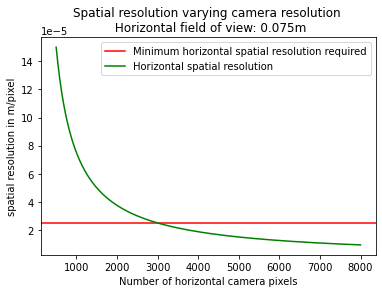

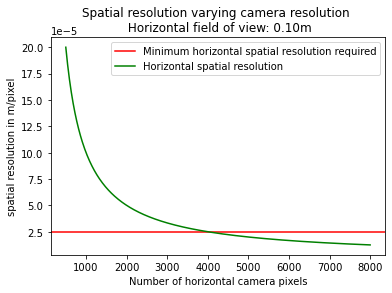

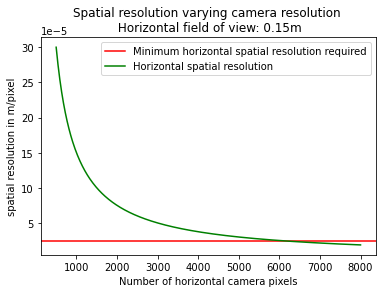

In [3]:
# horizontal field of view
hfov = [7.5e-2, 10e-2, 15e-2]

# horizontal camera resolution
cr = np.linspace(500,8000,500)

# plot
plt.figure(1)
sr = hfov[0]/cr
plt.axhline(y=2.5e-5, color="red")
plt.plot(cr, sr, color = "green")
plt.title("Spatial resolution varying camera resolution \n Horizontal field of view: 0.075m")
plt.xlabel("Number of horizontal camera pixels")
plt.ylabel("spatial resolution in m/pixel")
plt.ticklabel_format(style='sci', axis='y', scilimits=(-5,-5))
plt.legend(['Minimum horizontal spatial resolution required', 'Horizontal spatial resolution'], loc='upper right')

plt.figure(2)
sr = hfov[1]/cr
plt.axhline(y=2.5e-5, color="red")
plt.plot(cr, sr, color = "green")
plt.title("Spatial resolution varying camera resolution \n Horizontal field of view: 0.10m")
plt.xlabel("Number of horizontal camera pixels")
plt.ylabel("spatial resolution in m/pixel")
plt.ticklabel_format(style='sci', axis='y', scilimits=(-5,-5))
plt.legend(['Minimum horizontal spatial resolution required', 'Horizontal spatial resolution'], loc='upper right')

plt.figure(3)
sr = hfov[2]/cr
plt.axhline(y=2.5e-5, color="red")
plt.plot(cr, sr, color = "green")
plt.title("Spatial resolution varying camera resolution \n Horizontal field of view: 0.15m")
plt.xlabel("Number of horizontal camera pixels")
plt.ylabel("spatial resolution in m/pixel")
plt.ticklabel_format(style='sci', axis='y', scilimits=(-5,-5))
plt.legend(['Minimum horizontal spatial resolution required', 'Horizontal spatial resolution'], loc='upper right')

plt.show()

$\text{We conclude that our camera sensor needs a horizontal resolution of at least 3000 pixels if the field of view is not to be too small.} \newline \text{In addition, we note that there is (obviously) a tradeoff between field of view size and spatial resolution.} \newline \text{Regarding this problem, we keep in mind that we can easily increase the inspected area by using more cameras.}$

### Camera class
$\text{In order to evaluate a given camera sensor we make use of the following formulas.}$
- $\alpha = 2 \cdot tan^{-1}\left(\frac{sensorSize}{2\cdot focalLength}\right)$
- $fieldOfViewSize = 2 \cdot workingDistance \cdot tan\left(\frac{\alpha}{2}\right)$
- $spatialResolution = \frac{fieldOfViewSize}{numberOfPixels}$

$\text{We will now use this information to define a camera class together with some evaluation methods.}$

In [12]:
class Camera:
    
    def __init__(self, h_res, v_res, h_ssize, v_ssize, wd=0.3, f=0.035):
        self.H_res = h_res
        self.V_res = v_res
        self.H_ssize = h_ssize
        self.V_ssize = v_ssize
        self.Working_distance = wd
        self.Focal_length = f
        

    def compute_halpha(self):
        """
        Computes the 'horizontal' field of view angle
        """
        return 2 * np.arctan(0.5*self.H_ssize/self.Focal_length)
  

    def compute_valpha(self):
        """
        Computes the 'vertical' field of view angle
        """
        return 2 * np.arctan(0.5*self.V_ssize/self.Focal_length)
    
    
    def compute_hfov(self):
        """
        Computes the horizontal field of view.
        """
        return 2 * self.Working_distance * np.tan(self.compute_halpha()/2)
    
    
    def compute_vfov(self):
        """
        Computes the vertical field of view.
        """
        return 2 * self.Working_distance * np.tan(self.compute_valpha()/2)
   

    def compute_hsr(self):
        """
        Computes the horizontal spatial resolution.
        Should be the same as the vertical spatial resolution.
        """
        return self.compute_hfov()/self.H_res
    
    
    def compute_vsr(self):
        """
        Computes the vertical spatial resolution.
        Should be the same as the horizontal spatial resolution.
        """
        return self.compute_vfov()/self.V_res
   
    
    def plot_evaluation(self):
        """
        Varies the focal length and plots the corresponding values for spatial resolution
        and field of view.
        """
        # Step 1: Calculate alpha for different focal lengths
        f = np.linspace(10e-3,100e-3,100)  #from 1mm up to 100mm
        h_alpha = 2 * np.arctan(0.5 * self.H_ssize / f)
        v_alpha = 2 * np.arctan(0.5 * self.V_ssize / f)

        # Step 2: Compute corresponding fov sizes
        h_fov = 2 * self.Working_distance * np.tan(h_alpha/2)
        v_fov = 2 * self.Working_distance * np.tan(v_alpha/2)

        # Step 3: Compute the corresponding spatial resolutions
        h_sr =  h_fov/self.H_res
        v_sr = v_fov/self.V_res

        # Step 3: Plot the results
        # Spatial resolution
        plt.figure(1, (8,6))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(-5,-5))
        plt.plot(f,h_sr, color="cyan", linewidth=5)
        plt.plot(f, v_sr, color="black",linewidth=2)
        plt.axhline(y=2.5e-5, color = "red")
        plt.xlabel("Focal length in m")
        plt.ylabel("Spatial resolution in m/pixel")
        plt.title("Spatial resolution varying focal length \n working distance:"
                  + str(self.Working_distance) + "m, resolution:" + str(self.H_res) + 
                  "x" + str(self.V_res) + ", sensor size:" + str(self.H_ssize) 
                  + "m x" + str(self.V_ssize)+ "m \n")
        plt.legend(["Horizontal spatial resolution", "Vertical spatial resolution",
                    "Minimum required spatial resolution"], loc='upper right')
        # Field of view
        plt.figure(2, (8,6))
        plt.plot(f,h_fov, color="cyan", linewidth=2)
        plt.plot(f, v_fov, color="black",linewidth=2)
        plt.xlabel("Focal length in m")
        plt.ylabel("Field of view in m")
        plt.title("Field of view varying focal length \n working distance:" 
                  + str(self.Working_distance) + "m, resolution:" + str(self.H_res) 
                  + "x" + str(self.V_res) + ", sensor size:" + str(self.H_ssize) 
                  + "m x " + str(self.V_ssize)+ "m \n")
        plt.legend(["Horizontal field of view", "Vertical field of view"], loc='upper right')

### Evaluation of different sensors

#### 1) MaxxVision-CE200-10UM

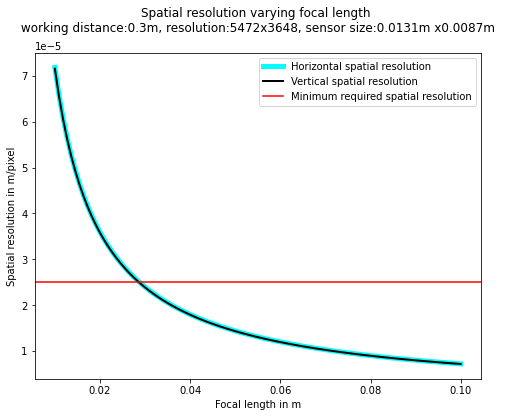

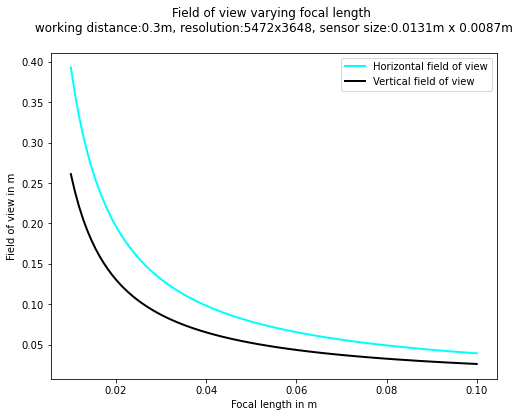

In [6]:
MVCE200_10UM = Camera(5472, 3648, 13.1e-3, 8.7e-3)
MVCE200_10UM.plot_evaluation()

In [7]:
MVCE200_10UM.Focal_length= 0.043 # Set the focal length to 0.035m
print("Horizontal spatial resolution: " + str(MVCE200_10UM.compute_hsr())) 
print("Vertical spatial resolution: " + str(MVCE200_10UM.compute_vsr()))
print("Horizontl field of view: " + str(MVCE200_10UM.compute_hfov()))
print("Vertical field of view: " + str(MVCE200_10UM.compute_vfov()))

Horizontal spatial resolution: 1.670236638106895e-05
Vertical spatial resolution: 1.663861689106487e-05
Horizontl field of view: 0.0913953488372093
Vertical field of view: 0.06069767441860465


#### 2) MER-1520-13U3C-L

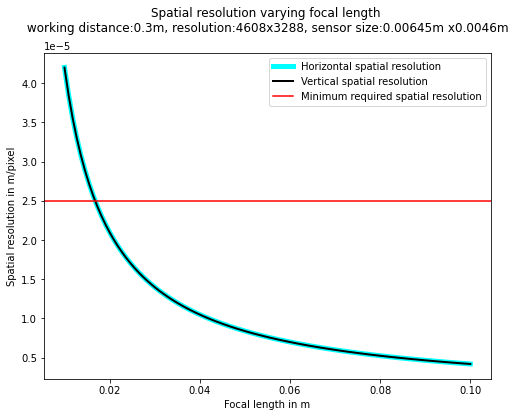

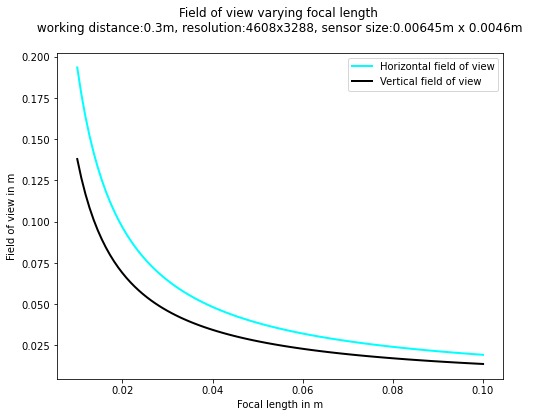

In [8]:
MER1520_13U3C_L = Camera(4608, 3288, 6.45e-3, 4.6e-3)
MER1520_13U3C_L.plot_evaluation()

In [9]:
MER1520_13U3C_L.Focal_length= 0.01678 # Set the focal length to 0.035m
print("Horizontal spatial resolution: " + str(MER1520_13U3C_L.compute_hsr())) 
print("Vertical spatial resolution: " + str(MER1520_13U3C_L.compute_vsr()))
print("Horizontl field of view: " + str(MER1520_13U3C_L.compute_hfov()))
print("Vertical field of view: " + str(MER1520_13U3C_L.compute_vfov()))

Horizontal spatial resolution: 2.502514153754469e-05
Vertical spatial resolution: 2.501239744917046e-05
Horizontl field of view: 0.11531585220500593
Vertical field of view: 0.08224076281287247


#### 5) TELEDYNE LUMENERA LT-C4020

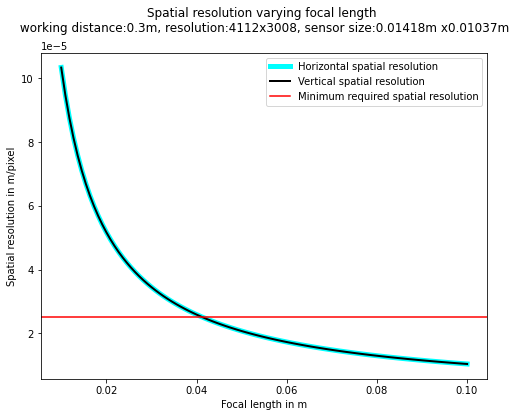

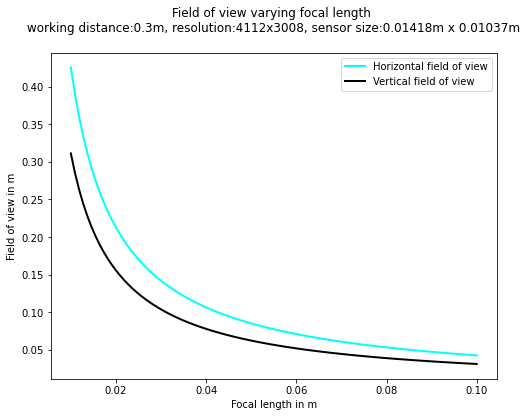

In [10]:
TELEDYNE_LUMENERA_LT_C4020 = Camera(4112, 3008, 14.18e-3, 10.37e-3)
TELEDYNE_LUMENERA_LT_C4020.plot_evaluation()

In [11]:
TELEDYNE_LUMENERA_LT_C4020.Focal_length= 0.04135 # Set the focal length to 0.035m
print("Horizontal spatial resolution: " + str(TELEDYNE_LUMENERA_LT_C4020.compute_hsr())) 
print("Vertical spatial resolution: " + str(TELEDYNE_LUMENERA_LT_C4020.compute_vsr()))
print("Horizontl field of view: " + str(TELEDYNE_LUMENERA_LT_C4020.compute_hfov()))
print("Vertical field of view: " + str(TELEDYNE_LUMENERA_LT_C4020.compute_vfov()))

Horizontal spatial resolution: 2.5018937700845492e-05
Vertical spatial resolution: 2.5011898942602077e-05
Horizontl field of view: 0.10287787182587667
Vertical field of view: 0.07523579201934705
